# Advanced Text2Cypher

In [1]:
import sys
DIR_SHIFT = "../../"
sys.path.append(DIR_SHIFT)

In [2]:
from IPython.display import Image, display

from langchain_neo4j import Neo4jGraph
from langchain_openai import ChatOpenAI

from ps_genai_agents.workflows.multi_agent import create_text2cypher_workflow
from ps_genai_agents.retrievers.cypher_examples import YAMLCypherExampleRetriever

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
graph = Neo4jGraph(enhanced_schema=True)

In [5]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [6]:
cypher_query_yaml_file_path = DIR_SHIFT+"data/iqs/queries/queries.yml"
cypher_example_retriever = YAMLCypherExampleRetriever(cypher_query_yaml_file_path=cypher_query_yaml_file_path)

In [7]:
scope_description = "This application may answer questions related to customer feedback on Honda vehicles."

In [8]:
agent = create_text2cypher_workflow(llm=llm, 
                                    graph=graph, 
                                    scope_description=scope_description, 
                                    cypher_example_retriever=cypher_example_retriever, 
                                    llm_cypher_validation=False, 
                                    attempt_cypher_execution_on_final_attempt=True)

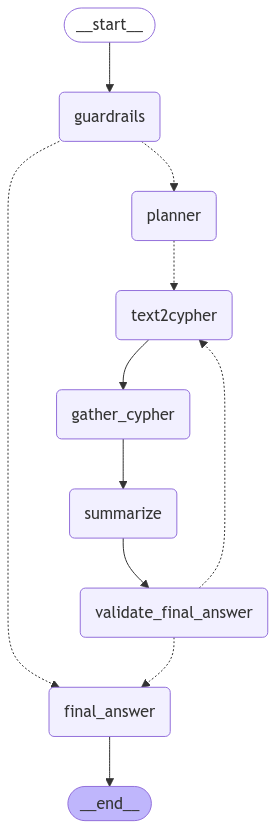

In [9]:
display(Image(agent.get_graph().draw_mermaid_png()))

In [10]:
response = await agent.ainvoke({"question": "Summarize the responses under fcd10 for honda pilot. What is the men to women proportion for these responses and what is the problem for fcd10?"})

In [11]:
print(response.get("question"), "\n")
print(response.get("answer"))

Summarize the responses under fcd10 for honda pilot. What is the men to women proportion for these responses and what is the problem for fcd10? 

**Problem for FCD10:**  
Door locks are broken or work inconsistently.

**Responses Summary:**  
- Touch system to lock and unlock often fails.  
- Doors sometimes get stuck, requiring manual opening.  
- Inconsistent auto-locking and unlocking behavior.  
- Passenger side doors occasionally fail to unlock.  
- Touching door handles sometimes locks instead of unlocking.  
- Difficulty unlocking front doors, requiring key fob use.  
- Locking issues when someone tries to open the door during unlocking.

**Men to Women Proportion:**  
- Male to Female Ratio: 0.4


In [12]:
[(print(c.get("task") + "\n\n"), [print(r) for r in c.get("records")], print("\n\n")) for c in response.get("cyphers")]

Summarize the responses under fcd10 for Honda Pilot, including the problem for fcd10.


{'problem': 'FCD10: Door locks - Broken/work inconsistently', 'responses': ['Touch system to lock and unlock does not work most of the time.  Real pain.', 'They have got stuck twice I had to open the door manually since it only opened the drivers door not matter how many times I would press the unlock button on the key fob or the door unlock button', "I have had at least 2 times I could not open the driver's side passenger door. I relocked and unlocked the doors with no luck and had to go in the other side and open from the inside. The child lock was not engaged. No idea why it's happened?", 'My vehicle system is set to auto-lock the doors when the key fob retreats to about 10 feet away, I believe. Most of the time it does. But there have been several times when I return to the vehicle and the locks do not "unlock" when I touch the door handle because they didn\'t appear to be locked in the first pl

[(None, [None], None), (None, [None], None)]

In [13]:
print(response.get("steps"))

['guardrails', 'planner', 'generate_cypher', 'validate_cypher', 'execute_cypher', 'text2cypher', 'generate_cypher', 'validate_cypher', 'execute_cypher', 'text2cypher', 'gather_cypher', 'summarize', 'validate_final_answer', 'final_answer']
